# Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
from datetime import datetime,timedelta

%matplotlib inline

In [2]:
df = pd.read_csv('client_data.csv')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [4]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [5]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

# Drop Unwanted Columns

In [6]:
df.drop(['channel_sales', 'cons_12m', 'cons_gas_12m', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
         'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
         'forecast_price_pow_off_peak', 'imp_cons', 'origin_up'],inplace=True,axis=1)

In [7]:
df.head()

,id,cons_last_month,date_activ,date_end,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,2013-06-15,2016-06-15,t,25.44,25.44,2,678.99,3,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,0,2009-08-21,2016-08-30,f,16.38,16.38,1,18.89,6,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,0,2010-04-16,2016-04-16,f,28.60,28.60,1,6.60,6,13.856,0
3,bba03439a292a1e166f80264c16191cb,0,2010-03-30,2016-03-30,f,30.22,30.22,1,25.46,6,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,526,2010-01-13,2016-03-07,f,44.91,44.91,1,47.98,6,19.800,0


In [8]:
df.to_csv('customerchurn.csv',index=False)

In [9]:
cust_churn = pd.read_csv('customerchurn.csv',parse_dates=['date_activ','date_end'],dayfirst=True)

In [10]:
cust_churn.head()

,id,cons_last_month,date_activ,date_end,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,2013-06-15,2016-06-15,t,25.44,25.44,2,678.99,3,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,0,2009-08-21,2016-08-30,f,16.38,16.38,1,18.89,6,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,0,2010-04-16,2016-04-16,f,28.60,28.60,1,6.60,6,13.856,0
3,bba03439a292a1e166f80264c16191cb,0,2010-03-30,2016-03-30,f,30.22,30.22,1,25.46,6,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,526,2010-01-13,2016-03-07,f,44.91,44.91,1,47.98,6,19.800,0


In [11]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    14606 non-null  object        
 1   cons_last_month       14606 non-null  int64         
 2   date_activ            14606 non-null  datetime64[ns]
 3   date_end              14606 non-null  datetime64[ns]
 4   has_gas               14606 non-null  object        
 5   margin_gross_pow_ele  14606 non-null  float64       
 6   margin_net_pow_ele    14606 non-null  float64       
 7   nb_prod_act           14606 non-null  int64         
 8   net_margin            14606 non-null  float64       
 9   num_years_antig       14606 non-null  int64         
 10  pow_max               14606 non-null  float64       
 11  churn                 14606 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 1.3+ M

In [12]:
cust_churn['duration'] = (cust_churn.date_end - cust_churn.date_activ).dt.days

In [13]:
cust_churn.head()

,id,cons_last_month,date_activ,date_end,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration
0,24011ae4ebbe3035111d65fa7c15bc57,0,2013-06-15,2016-06-15,t,25.44,25.44,2,678.99,3,43.648,1,1096
1,d29c2c54acc38ff3c0614d0a653813dd,0,2009-08-21,2016-08-30,f,16.38,16.38,1,18.89,6,13.800,0,2566
2,764c75f661154dac3a6c254cd082ea7d,0,2010-04-16,2016-04-16,f,28.60,28.60,1,6.60,6,13.856,0,2192
3,bba03439a292a1e166f80264c16191cb,0,2010-03-30,2016-03-30,f,30.22,30.22,1,25.46,6,13.200,0,2192
4,149d57cf92fc41cf94415803a877cb4b,526,2010-01-13,2016-03-07,f,44.91,44.91,1,47.98,6,19.800,0,2245


In [14]:
cust_price = pd.read_csv('price_data.csv')
cust_price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [15]:
final_df = pd.merge(left=cust_churn, right=cust_price, on='id', how='inner')

In [16]:
final_df.head()

,id,cons_last_month,date_activ,date_end,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,0,2013-06-15,2016-06-15,t,25.44,25.44,2,678.99,3,43.648,1,1096,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,0,2013-06-15,2016-06-15,t,25.44,25.44,2,678.99,3,43.648,1,1096,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,0,2013-06-15,2016-06-15,t,25.44,25.44,2,678.99,3,43.648,1,1096,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,0,2013-06-15,2016-06-15,t,25.44,25.44,2,678.99,3,43.648,1,1096,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,0,2013-06-15,2016-06-15,t,25.44,25.44,2,678.99,3,43.648,1,1096,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    175149 non-null  object        
 1   cons_last_month       175149 non-null  int64         
 2   date_activ            175149 non-null  datetime64[ns]
 3   date_end              175149 non-null  datetime64[ns]
 4   has_gas               175149 non-null  object        
 5   margin_gross_pow_ele  175149 non-null  float64       
 6   margin_net_pow_ele    175149 non-null  float64       
 7   nb_prod_act           175149 non-null  int64         
 8   net_margin            175149 non-null  float64       
 9   num_years_antig       175149 non-null  int64         
 10  pow_max               175149 non-null  float64       
 11  churn                 175149 non-null  int64         
 12  duration              175149 non-null  int64         
 13 

In [18]:
final_df.isna().sum()

id                      0
cons_last_month         0
date_activ              0
date_end                0
has_gas                 0
margin_gross_pow_ele    0
margin_net_pow_ele      0
nb_prod_act             0
net_margin              0
num_years_antig         0
pow_max                 0
churn                   0
duration                0
price_date              0
price_off_peak_var      0
price_peak_var          0
price_mid_peak_var      0
price_off_peak_fix      0
price_peak_fix          0
price_mid_peak_fix      0
dtype: int64

In [19]:
final_df.drop(['id','date_activ','date_end','price_date'],axis=1,inplace=True)

In [20]:
final_df.head()

,cons_last_month,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0,t,25.44,25.44,2,678.99,3,43.648,1,1096,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,0,t,25.44,25.44,2,678.99,3,43.648,1,1096,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,0,t,25.44,25.44,2,678.99,3,43.648,1,1096,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,0,t,25.44,25.44,2,678.99,3,43.648,1,1096,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,0,t,25.44,25.44,2,678.99,3,43.648,1,1096,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cons_last_month       175149 non-null  int64  
 1   has_gas               175149 non-null  object 
 2   margin_gross_pow_ele  175149 non-null  float64
 3   margin_net_pow_ele    175149 non-null  float64
 4   nb_prod_act           175149 non-null  int64  
 5   net_margin            175149 non-null  float64
 6   num_years_antig       175149 non-null  int64  
 7   pow_max               175149 non-null  float64
 8   churn                 175149 non-null  int64  
 9   duration              175149 non-null  int64  
 10  price_off_peak_var    175149 non-null  float64
 11  price_peak_var        175149 non-null  float64
 12  price_mid_peak_var    175149 non-null  float64
 13  price_off_peak_fix    175149 non-null  float64
 14  price_peak_fix        175149 non-null  float64
 15  

#Treat Duplicate Values

In [22]:
final_df.duplicated(keep='first').sum()

118784

In [23]:
final_df.drop_duplicates(ignore_index=True,inplace=True)

In [24]:
final_df.duplicated(keep='first').sum()

0

# One Hot-Encoding

In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56365 entries, 0 to 56364
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cons_last_month       56365 non-null  int64  
 1   has_gas               56365 non-null  object 
 2   margin_gross_pow_ele  56365 non-null  float64
 3   margin_net_pow_ele    56365 non-null  float64
 4   nb_prod_act           56365 non-null  int64  
 5   net_margin            56365 non-null  float64
 6   num_years_antig       56365 non-null  int64  
 7   pow_max               56365 non-null  float64
 8   churn                 56365 non-null  int64  
 9   duration              56365 non-null  int64  
 10  price_off_peak_var    56365 non-null  float64
 11  price_peak_var        56365 non-null  float64
 12  price_mid_peak_var    56365 non-null  float64
 13  price_off_peak_fix    56365 non-null  float64
 14  price_peak_fix        56365 non-null  float64
 15  price_mid_peak_fix 

In [26]:
final_df['has_gas'] = pd.get_dummies(data=final_df['has_gas'],drop_first=True)

In [27]:
final_df.head()

,cons_last_month,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0,1,25.44,25.44,2,678.99,3,43.648,1,1096,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,0,1,25.44,25.44,2,678.99,3,43.648,1,1096,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
2,0,1,25.44,25.44,2,678.99,3,43.648,1,1096,0.125640,0.103963,0.073873,40.728885,24.437330,16.291555
3,0,1,25.44,25.44,2,678.99,3,43.648,1,1096,0.117479,0.099794,0.073819,40.728885,24.437330,16.291555
4,0,1,25.44,25.44,2,678.99,3,43.648,1,1096,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000


In [28]:
final_df.to_csv('final2.csv',index=False)

# Modelling and Evaluation

In [29]:
df = pd.read_csv('final2.csv')

In [30]:
df.head()

,cons_last_month,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0,1,25.44,25.44,2,678.99,3,43.648,1,1096,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,0,1,25.44,25.44,2,678.99,3,43.648,1,1096,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
2,0,1,25.44,25.44,2,678.99,3,43.648,1,1096,0.125640,0.103963,0.073873,40.728885,24.437330,16.291555
3,0,1,25.44,25.44,2,678.99,3,43.648,1,1096,0.117479,0.099794,0.073819,40.728885,24.437330,16.291555
4,0,1,25.44,25.44,2,678.99,3,43.648,1,1096,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56365 entries, 0 to 56364
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cons_last_month       56365 non-null  int64  
 1   has_gas               56365 non-null  int64  
 2   margin_gross_pow_ele  56365 non-null  float64
 3   margin_net_pow_ele    56365 non-null  float64
 4   nb_prod_act           56365 non-null  int64  
 5   net_margin            56365 non-null  float64
 6   num_years_antig       56365 non-null  int64  
 7   pow_max               56365 non-null  float64
 8   churn                 56365 non-null  int64  
 9   duration              56365 non-null  int64  
 10  price_off_peak_var    56365 non-null  float64
 11  price_peak_var        56365 non-null  float64
 12  price_mid_peak_var    56365 non-null  float64
 13  price_off_peak_fix    56365 non-null  float64
 14  price_peak_fix        56365 non-null  float64
 15  price_mid_peak_fix 

In [32]:
df.describe()

,cons_last_month,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000,56365.000000
mean,14853.179030,0.179970,24.353153,24.349780,1.289825,187.138070,4.960809,17.890675,0.098146,2005.449463,0.143391,0.051780,0.027386,43.138100,9.134691,5.929339
std,60874.127265,0.384166,20.078420,20.077219,0.692266,300.027285,1.580625,12.958680,0.297515,593.307228,0.020798,0.050191,0.035834,3.375684,12.000081,7.790743
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000,731.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.810000,13.800000,1.000000,50.520000,4.000000,12.500000,0.000000,1461.000000,0.127175,0.000000,0.000000,40.728885,0.000000,0.000000
50%,751.000000,0.000000,21.520000,21.520000,1.000000,111.580000,5.000000,13.856000,0.000000,1829.000000,0.146788,0.084213,0.000000,44.266930,0.000000,0.000000
75%,3219.000000,0.000000,29.760000,29.760000,1.000000,238.450000,6.000000,18.336000,0.000000,2375.000000,0.151635,0.102229,0.072612,44.266931,24.339581,16.226389
max,771203.000000,1.000000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000,4795.000000,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221


# Data Visualization

Univariant Data Analysis

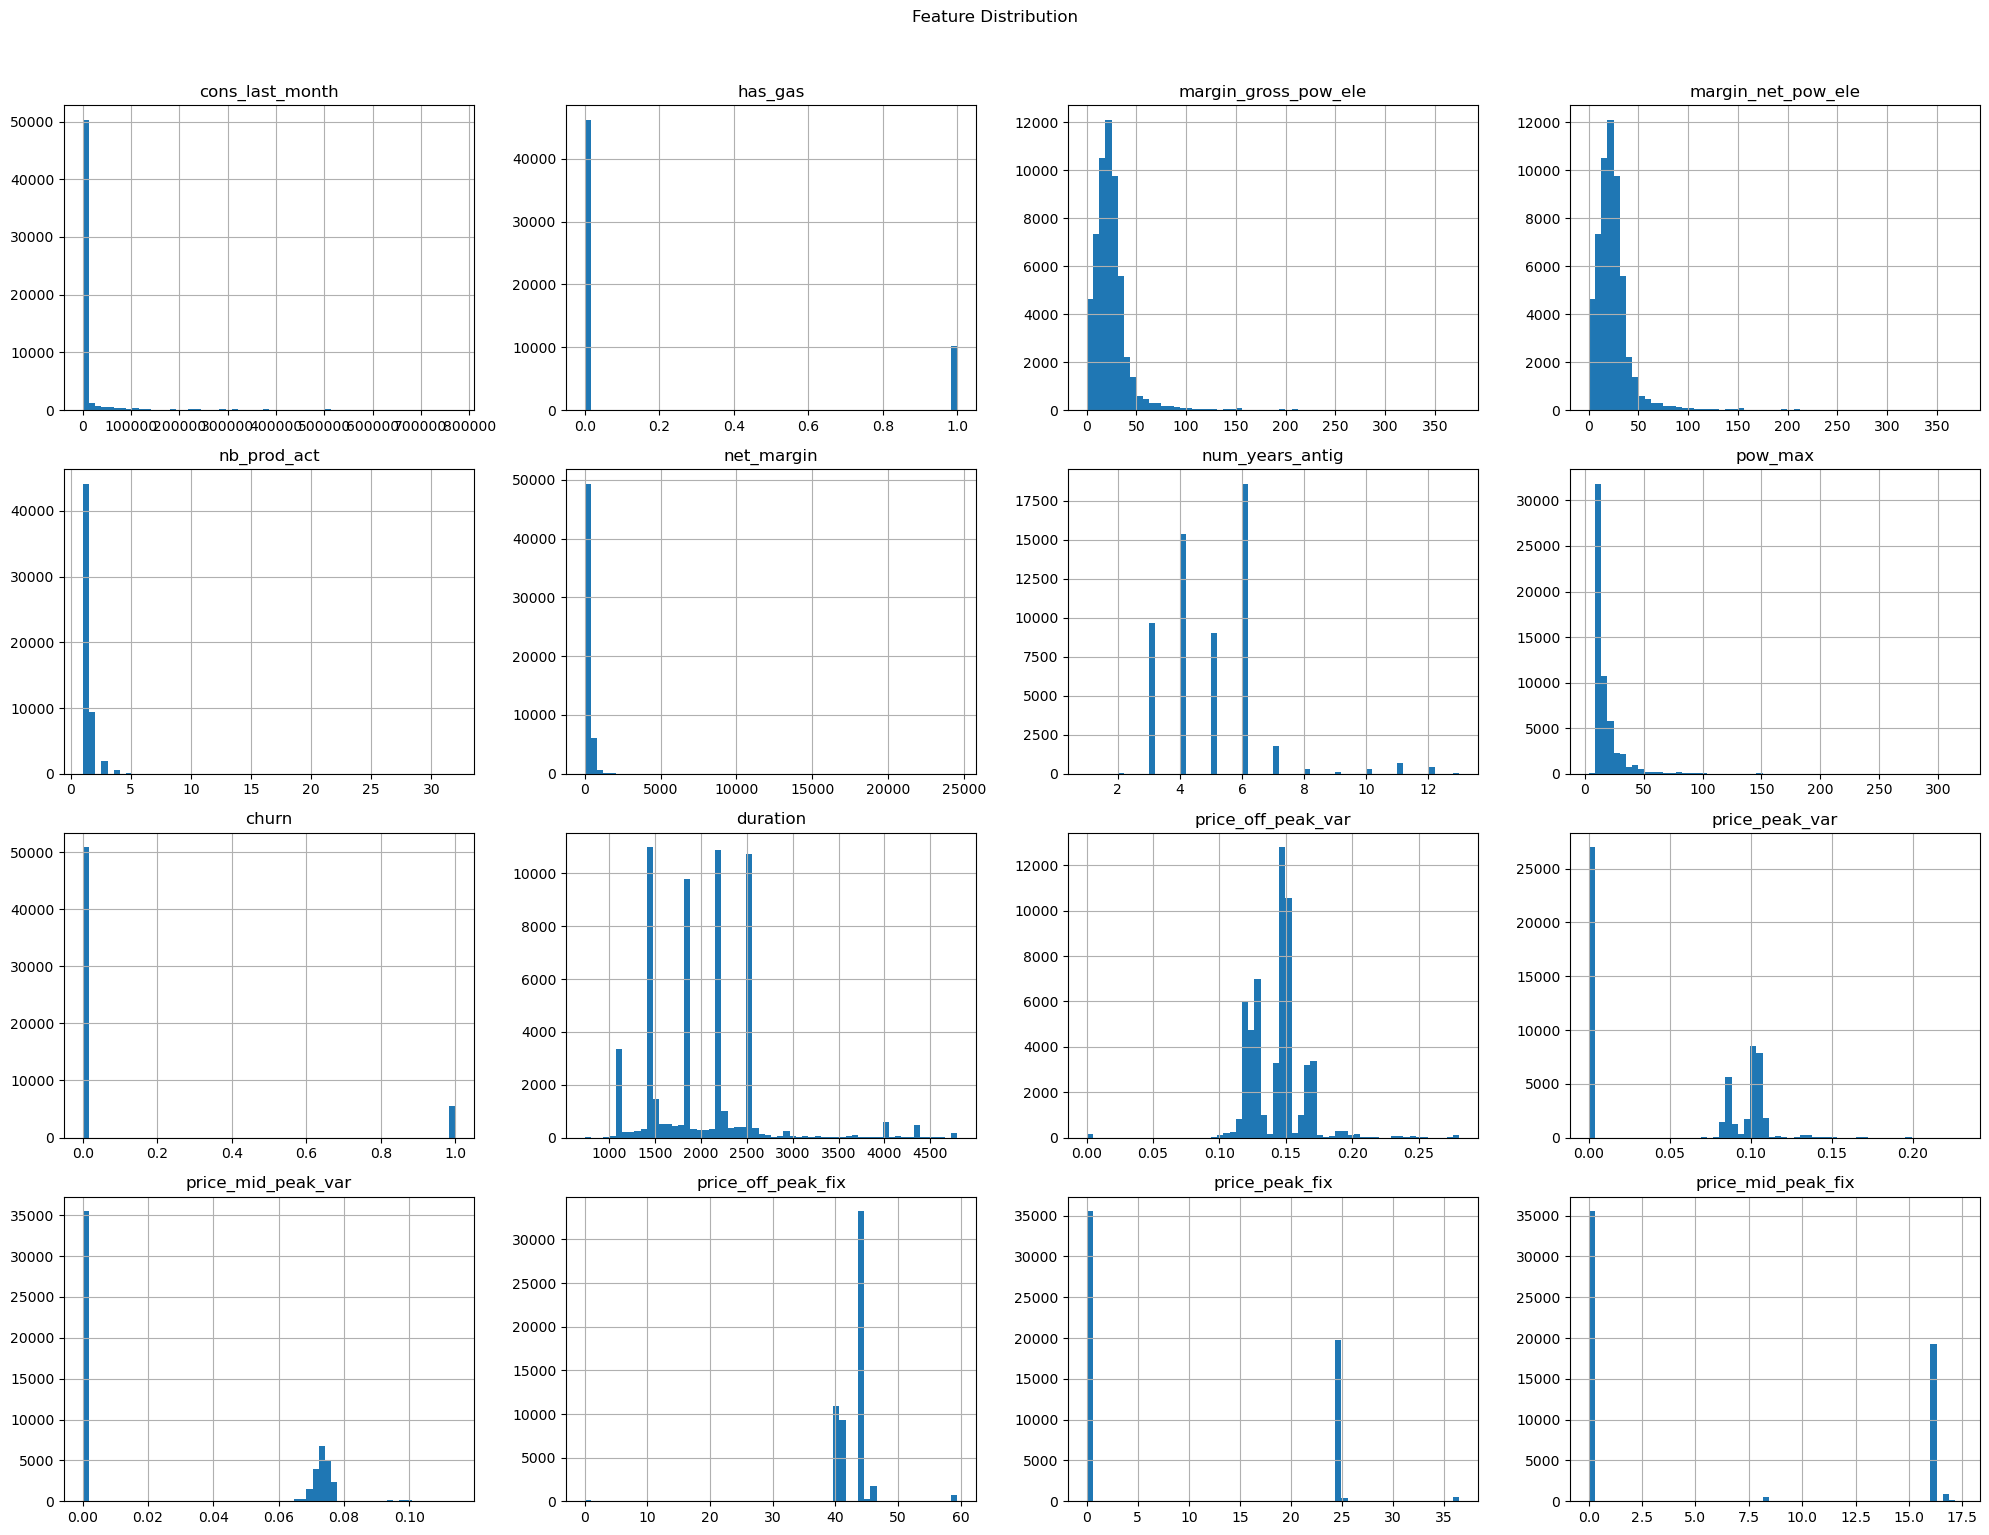

In [33]:
df.hist(figsize=(20,15),bins=60)
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')
plt.tight_layout()

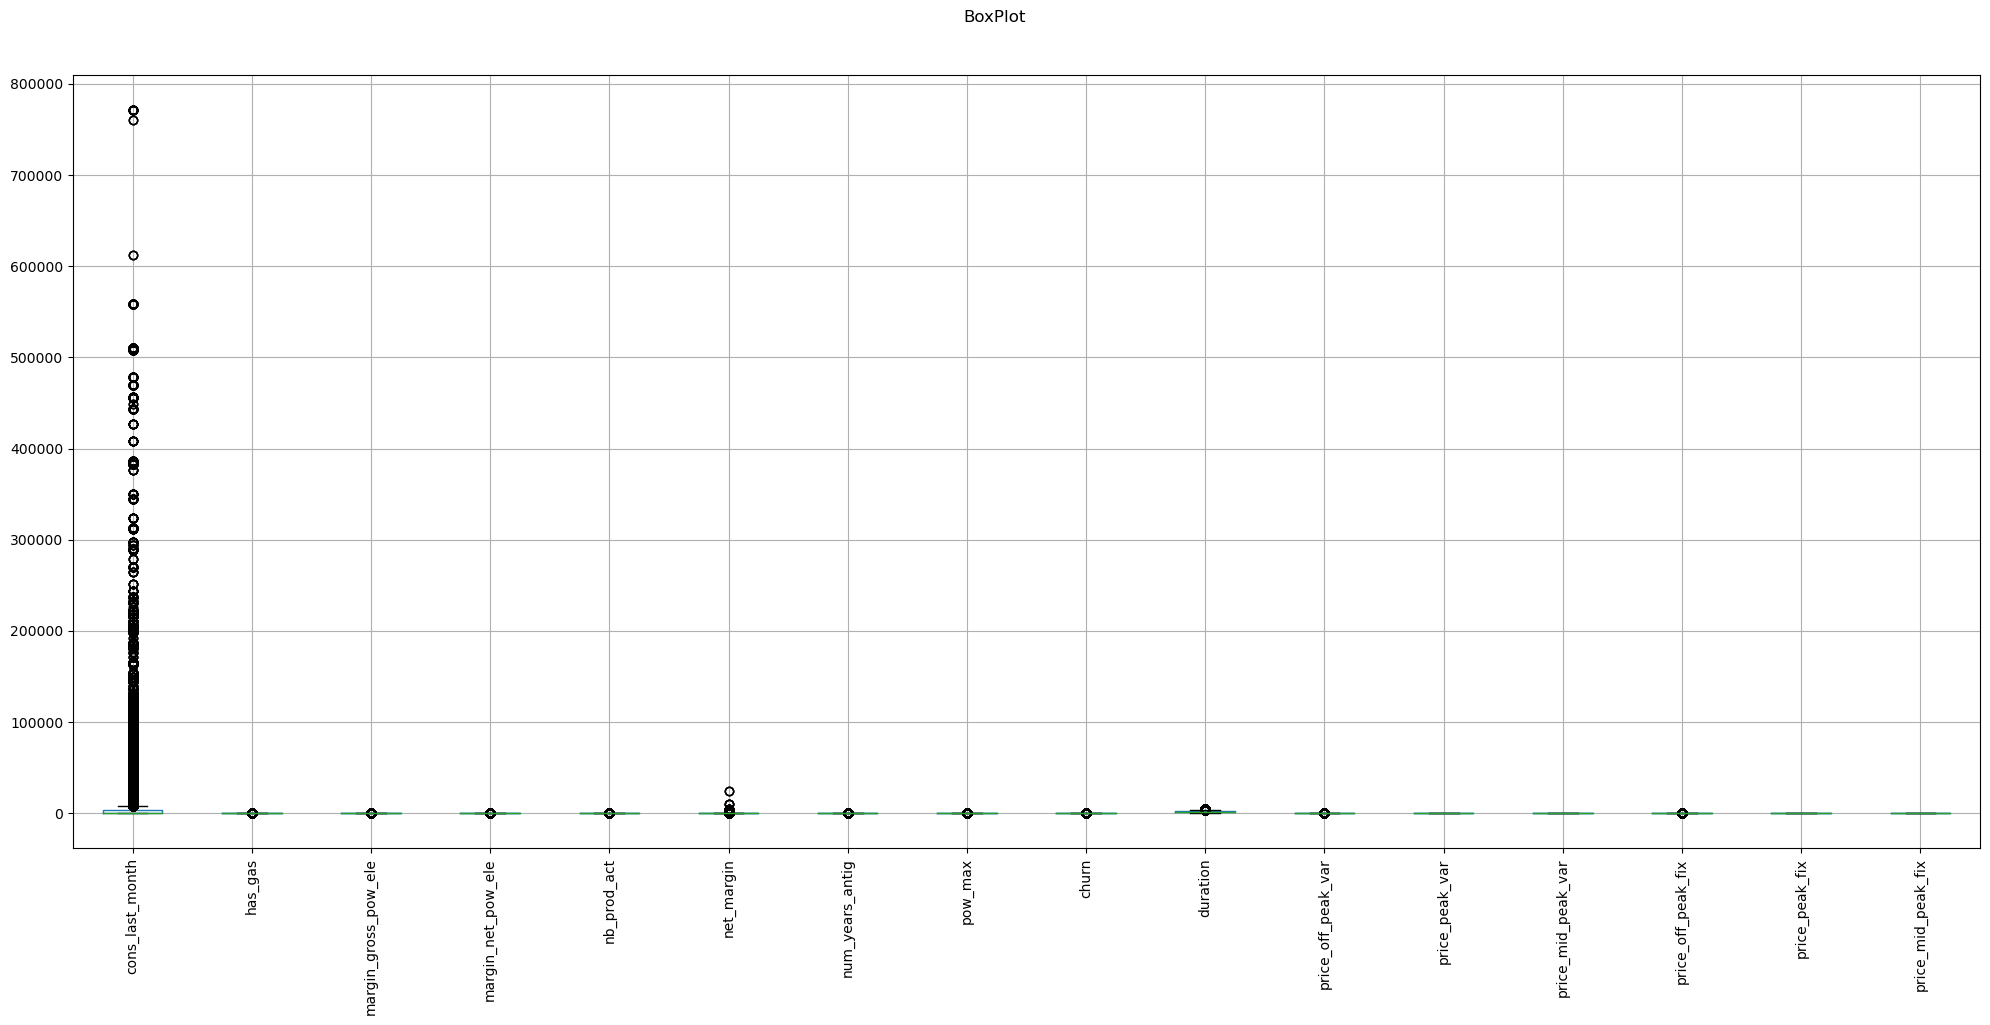

In [34]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot',x=0.5,y=1.02,ha='center',fontsize='large')
plt.xticks(rotation=90)
plt.tight_layout()

# Correlation

In [35]:
df.corr()

,cons_last_month,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
cons_last_month,1.000000,0.214337,-0.006334,-0.006308,0.166333,0.124351,-0.002540,0.082437,-0.043791,-0.020681,-0.007295,0.130009,0.047510,-0.030821,0.049493,0.050388
has_gas,0.214337,1.000000,-0.013829,-0.013828,0.741109,0.089646,0.013515,0.056716,-0.025860,0.011907,-0.045188,0.062632,0.065957,-0.043896,0.063962,0.068919
margin_gross_pow_ele,-0.006334,-0.013829,1.000000,0.999887,-0.001690,0.041990,-0.061706,0.395865,0.098558,-0.129721,0.079769,0.153547,0.200499,-0.091542,0.166615,0.196688
margin_net_pow_ele,-0.006308,-0.013828,0.999887,1.000000,-0.001662,0.041752,-0.061852,0.395935,0.098619,-0.129831,0.079473,0.153667,0.200577,-0.091623,0.166693,0.196765
nb_prod_act,0.166333,0.741109,-0.001690,-0.001662,1.000000,0.053698,0.010008,0.016563,-0.015963,0.006573,0.013351,0.039732,0.030278,-0.018877,0.025992,0.030398
net_margin,0.124351,0.089646,0.041990,0.041752,0.053698,1.000000,-0.000695,0.338906,0.039519,-0.013898,-0.148348,0.236182,0.255942,-0.089100,0.258401,0.246584
num_years_antig,-0.002540,0.013515,-0.061706,-0.061852,0.010008,-0.000695,1.000000,0.045162,-0.072407,0.954689,-0.115912,0.078903,0.049990,-0.052140,0.069403,0.050869
pow_max,0.082437,0.056716,0.395865,0.395935,0.016563,0.338906,0.045162,1.000000,0.033341,0.033670,-0.397567,0.421523,0.520451,-0.167237,0.542108,0.510546
churn,-0.043791,-0.025860,0.098558,0.098619,-0.015963,0.039519,-0.072407,0.033341,1.000000,-0.072806,-0.020737,0.030102,0.047311,0.000977,0.048825,0.045275
duration,-0.020681,0.011907,-0.129721,-0.129831,0.006573,-0.013898,0.954689,0.033670,-0.072806,1.000000,-0.121253,0.071064,0.043994,-0.049195,0.063108,0.045047


<AxesSubplot:>

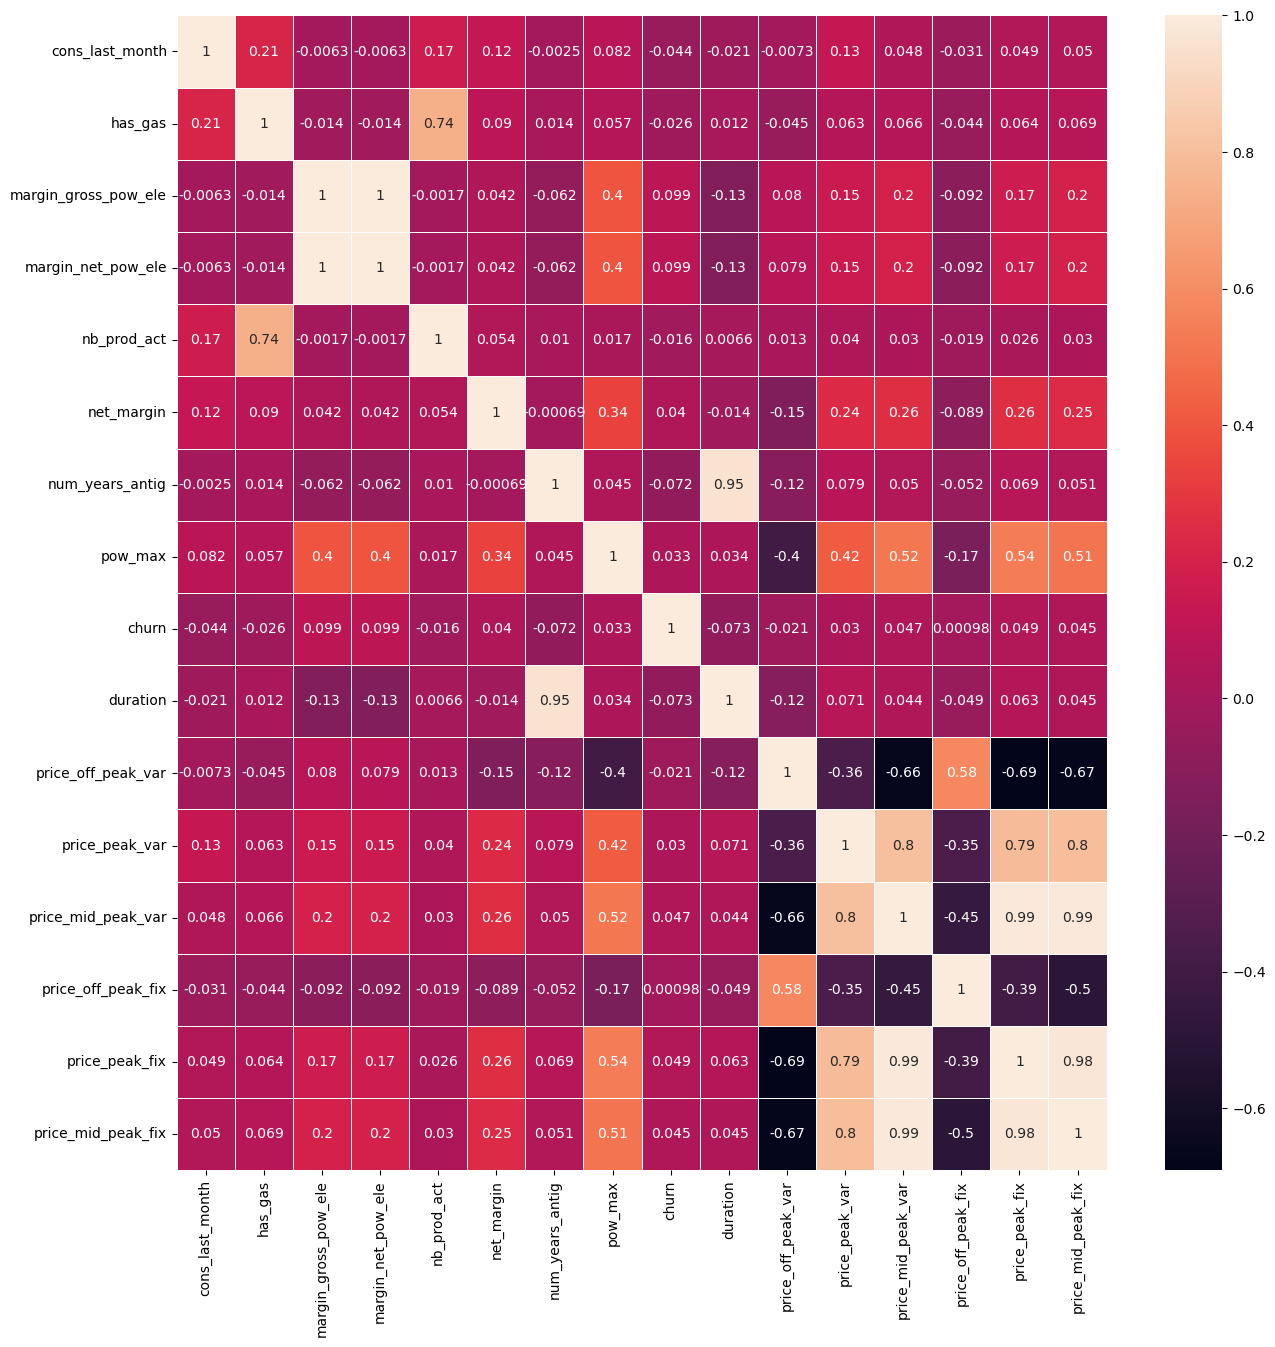

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(),annot=True,linecolor='white',linewidths=0.5)

# Train Test Split

In [37]:
df['churn_final'] = df.churn

In [38]:
df.drop('churn',axis=1,inplace=True)

In [39]:
df.head()

,cons_last_month,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,duration,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn_final
0,0,1,25.44,25.44,2,678.99,3,43.648,1096,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1
1,0,1,25.44,25.44,2,678.99,3,43.648,1096,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,1
2,0,1,25.44,25.44,2,678.99,3,43.648,1096,0.125640,0.103963,0.073873,40.728885,24.437330,16.291555,1
3,0,1,25.44,25.44,2,678.99,3,43.648,1096,0.117479,0.099794,0.073819,40.728885,24.437330,16.291555,1
4,0,1,25.44,25.44,2,678.99,3,43.648,1096,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000,1


In [40]:
df.shape

(56365, 16)

In [41]:
X = df.iloc[:,0:15]
y = df.iloc[:,15]

# Treat Imbalance Data

In [42]:
y.value_counts()

0    50833
1     5532
Name: churn_final, dtype: int64

In [43]:
from imblearn.under_sampling import RandomUnderSampler

In [44]:
ros = RandomUnderSampler(sampling_strategy='majority',random_state=0)

In [45]:
new_X,new_y = ros.fit_resample(X,y)

In [46]:
new_y.value_counts()

0    5532
1    5532
Name: churn_final, dtype: int64

In [47]:
new_X.head()

,cons_last_month,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,duration,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
39551,15772,0,27.44,27.44,1,73.94,4,17.321,1461,0.128077,0.106401,0.076311,40.728885,24.43733,16.291555
54261,0,0,29.34,29.34,1,37.97,6,14.500,2557,0.144291,0.000000,0.000000,44.444710,0.00000,0.000000
46551,78,0,34.68,34.68,1,15.29,4,13.856,1827,0.152445,0.000000,0.000000,44.266930,0.00000,0.000000
32893,790,0,31.64,31.64,1,80.08,4,13.856,1461,0.167798,0.088409,0.000000,44.444710,0.00000,0.000000
42230,0,0,36.24,36.24,1,114.20,4,14.490,1461,0.167118,0.088062,0.000000,44.266930,0.00000,0.000000


In [48]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=0)

In [108]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8851, 15), (2213, 15), (8851,), (2213,))

# Feature Scaling

In [109]:
from pycaret.classification import *

In [110]:
exp = setup(data = df, target = 'churn_final', session_id=0, normalize=True, train_size=0.8, fix_imbalance=False)

,Description,Value
0,Session id,0
1,Target,churn_final
2,Target type,Binary
3,Original data shape,"(56365, 16)"
4,Transformed data shape,"(56365, 16)"
5,Transformed train set shape,"(45092, 16)"
6,Transformed test set shape,"(11273, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [111]:
compare_models(exclude=['catboost','lightgbm','lda','qda','mlp','nb','ridge'],fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9617,0.8932,0.8079,0.8029,0.8053,0.7841,0.7841,0.2060
rf,Random Forest Classifier,0.9527,0.9740,0.5289,0.9790,0.6867,0.6635,0.7005,0.6700
et,Extra Trees Classifier,0.9505,0.9579,0.5520,0.9072,0.6859,0.6607,0.6851,0.7180
gbc,Gradient Boosting Classifier,0.9034,0.7156,0.0169,0.9152,0.0333,0.0298,0.1169,0.3300
knn,K Neighbors Classifier,0.9027,0.8248,0.2488,0.5090,0.3341,0.2882,0.3099,2.3900
dummy,Dummy Classifier,0.9018,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2120
ada,Ada Boost Classifier,0.9017,0.6733,0.0018,0.4600,0.0036,0.0026,0.0224,0.3900
svm,SVM - Linear Kernel,0.9016,0.0000,0.0023,0.0645,0.0044,0.0031,0.0089,0.2040
lr,Logistic Regression,0.9007,0.6381,0.0034,0.1861,0.0066,0.0031,0.0124,0.2460


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

In [112]:
dt = create_model('dt',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9652,0.9068,0.8341,0.8157,0.8248,0.8055,0.8055
1,0.9665,0.9059,0.8305,0.8286,0.8296,0.8110,0.8110
2,0.9600,0.8902,0.8034,0.7918,0.7975,0.7753,0.7753
3,0.9580,0.8856,0.7955,0.7805,0.7879,0.7646,0.7646
4,0.9587,0.8774,0.7763,0.7979,0.7869,0.7641,0.7642
Mean,0.9617,0.8932,0.8079,0.8029,0.8053,0.7841,0.7841
Std,0.0035,0.0115,0.0218,0.0172,0.0183,0.0202,0.0202


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [113]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')


In [114]:
tuned_dt = tune_model(dt,optimize='F1',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9129,0.7580,0.1659,0.7577,0.2722,0.2456,0.3285
1,0.9122,0.7566,0.1503,0.7688,0.2514,0.2266,0.3153
2,0.9120,0.7806,0.1740,0.7097,0.2795,0.2505,0.3228
3,0.9126,0.7481,0.1763,0.7256,0.2836,0.2551,0.3296
4,0.9112,0.7514,0.1345,0.7727,0.2291,0.2060,0.2989
Mean,0.9122,0.7589,0.1602,0.7469,0.2632,0.2367,0.3190
Std,0.0006,0.0114,0.0158,0.0249,0.0203,0.0182,0.0113


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [115]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')


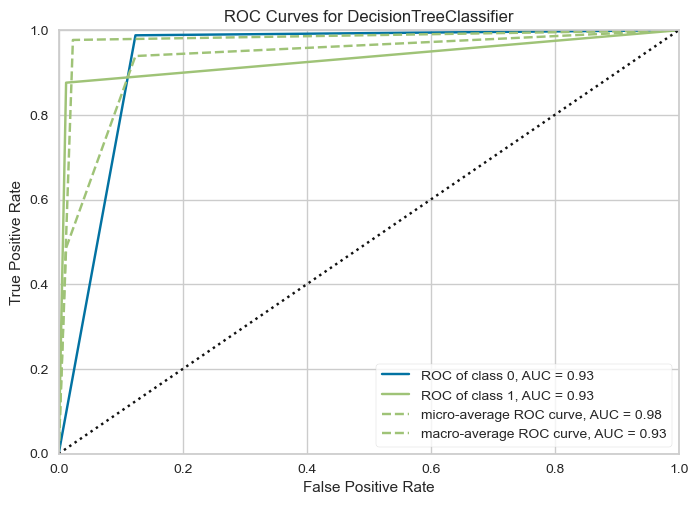

In [116]:
plot_model(tuned_dt)

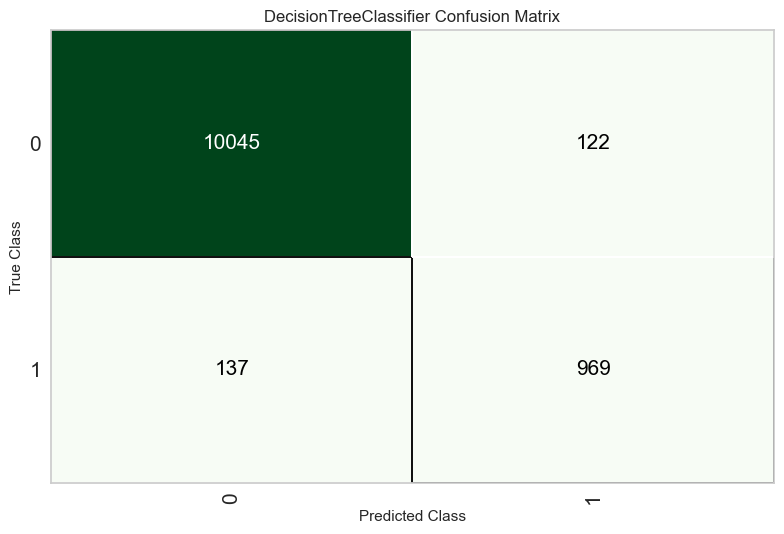

In [117]:
plot_model(tuned_dt,plot='confusion_matrix')

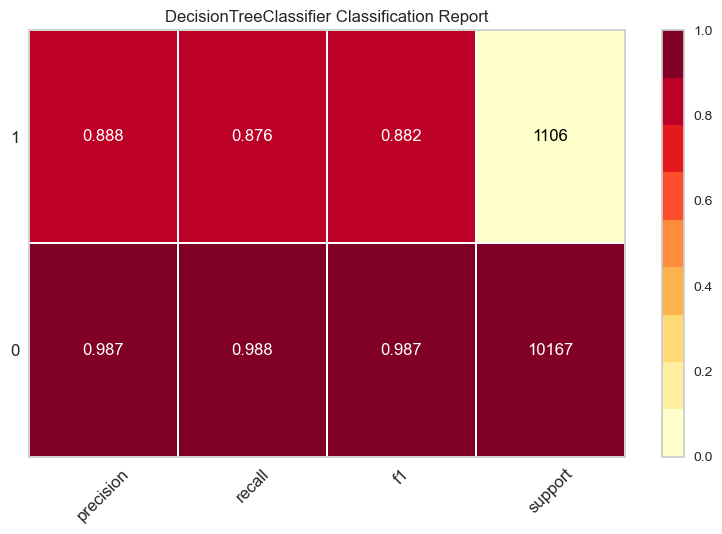

In [118]:
plot_model(tuned_dt,plot='class_report')

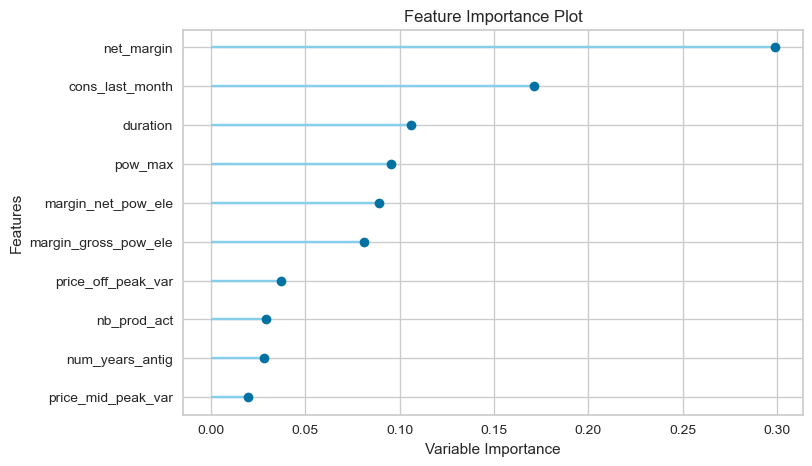

In [119]:
plot_model(tuned_dt,plot='feature')

# Classification and Regression Model

In [93]:
!pip install xgboost

In [94]:
import xgboost as xg

In [95]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [96]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [97]:
model = XGBClassifier(random_state=0,n_estimator=100, objective='binary:logistic' )

In [98]:
parameters = {'max_depth': np.arange(3,10,1),
              'eta': np.arange(0.05,0.3,0.05),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,10,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1),
              'reg_alpha':np.arange(0,1,0.1),
              'reg_lambda':np.arange(0,1,0.1)
             }

In [99]:
randm = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5, n_iter=10, n_jobs=-1, scoring='f1')

In [100]:
randm.fit(new_X,new_y)

[18:14:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.



RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=No...
                                        'min_child_weight': array([1, 2, 3]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'reg_lambda': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

In [101]:
randm.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=8, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimator=100, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [102]:
randm.best_score_

0.5904042826955269

In [103]:
randm.best_params_

{'subsample': 0.5,
 'reg_lambda': 0.6000000000000001,
 'reg_alpha': 0.7000000000000001,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 5,
 'gamma': 8,
 'eta': 0.05,
 'colsample_bytree': 0.6}

# Final Model

In [104]:
xgbtmodel = XGBClassifier(subsample=0.5,reg_lambda=0.6,reg_alpha=0.7,n_estimatores=300,min_child_weight=1,max_depth=5,gamma=8,eta=0.05,
                          colsample_bytree=0.6,random_state=0,objective='binary:logistic')

In [120]:
xgbtmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='logloss',early_stopping_rounds=10)

[18:18:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimatores" } are not used.

[0]	validation_0-logloss:0.68931
[1]	validation_0-logloss:0.68561
[2]	validation_0-logloss:0.68505
[3]	validation_0-logloss:0.68291
[4]	validation_0-logloss:0.68077
[5]	validation_0-logloss:0.67789
[6]	validation_0-logloss:0.67493
[7]	validation_0-logloss:0.67188
[8]	validation_0-logloss:0.66958
[9]	validation_0-logloss:0.66723
[10]	validation_0-logloss:0.66470
[11]	validation_0-logloss:0.66329
[12]	validation_0-logloss:0.66127
[13]	validation_0-logloss:0.65913
[14]	validation_0-logloss:0.65765
[15]	validation_0-logloss:0.65651
[16]	validation_0-logloss:0.65583
[17]	validation_0-logloss:0.65433
[18]	validation_0-logloss:0.65357
[19]	validation_0-logloss:0.65288
[20]	validation_0-logloss:0.65161
[21]	validation_0-logloss:0.65054
[22]	validation_0-logloss:0.64939
[23]	validation_0-logloss

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=8, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimatores=300, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [121]:
y_pred = xgbtmodel.predict(X_test)

In [122]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

# Model Evaluation

In [136]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score

In [124]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[767, 317],
       [424, 705]], dtype=int64)

Text(0.5, 27.722222222222214, 'Predicted label')

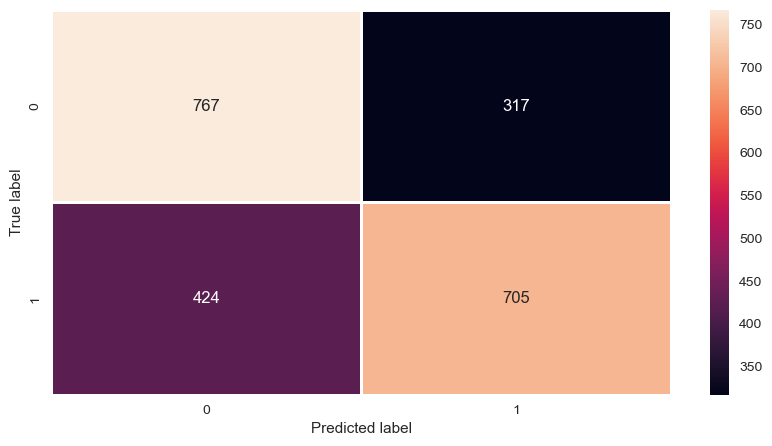

In [125]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1084
           1       0.69      0.62      0.66      1129

    accuracy                           0.67      2213
   macro avg       0.67      0.67      0.66      2213
weighted avg       0.67      0.67      0.66      2213



In [128]:
print(accuracy_score(y_test,y_pred)*100)

66.51604157252599


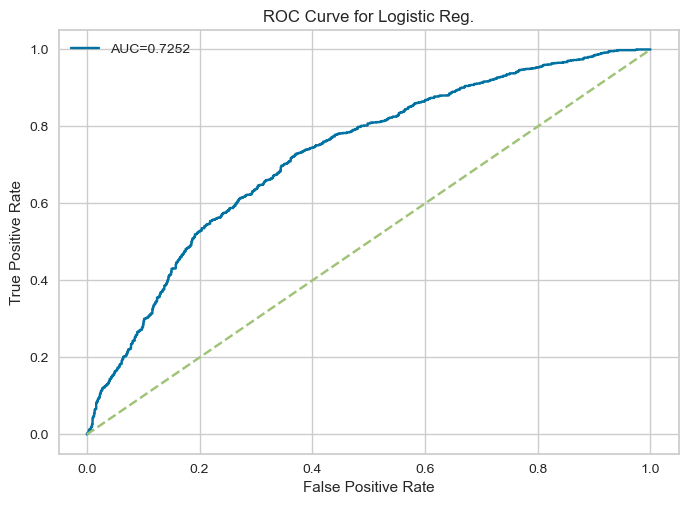

In [137]:
xgb_pred_prob = xgbtmodel.predict_proba(X_test)[:][:,1]

xgb_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(xgb_pred_prob,columns=['y pred prob'])],axis=1)
xgb_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(xgb_actual_predict['y actual'],xgb_actual_predict['y pred prob'])
auc = roc_auc_score(xgb_actual_predict['y actual'],xgb_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Reg.')
plt.legend()

# Compute Importance from SHAP Values

In [146]:
import shap

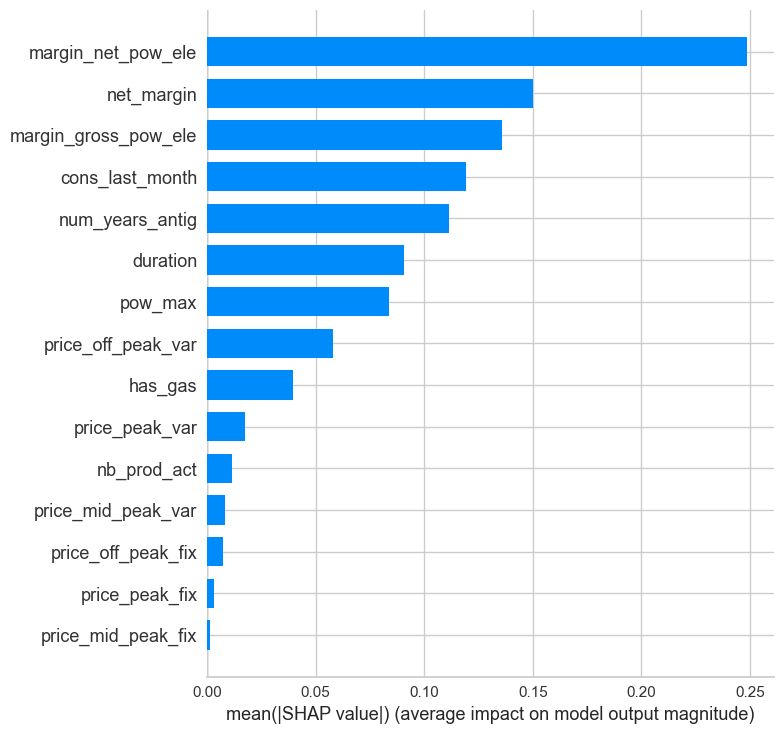

In [148]:
explainer = shap.TreeExplainer(xgbtmodel)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

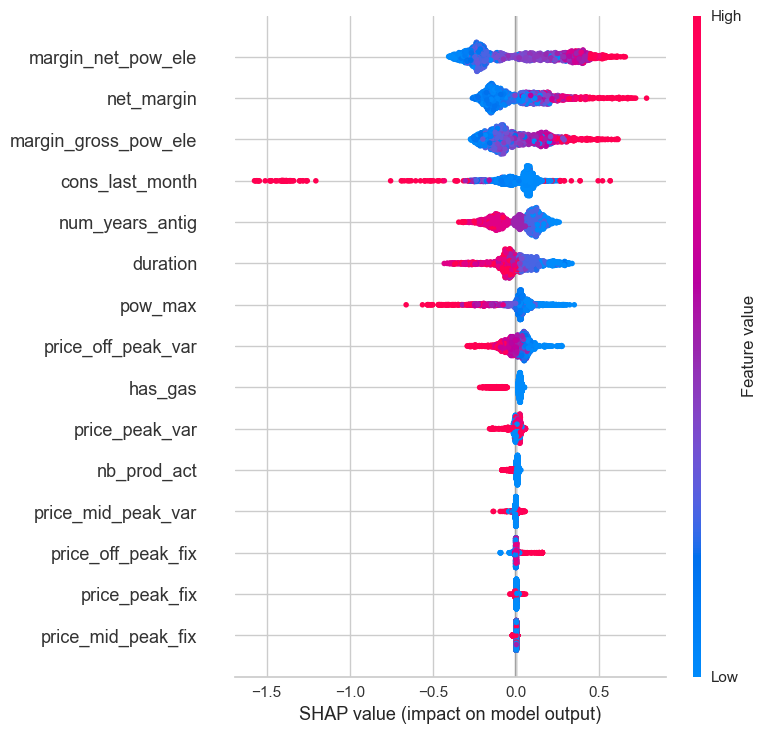

In [149]:
shap.summary_plot(shap_values, X_test)

In [152]:
new_X.columns

Index(['cons_last_month', 'has_gas', 'margin_gross_pow_ele',
       'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
       'pow_max', 'duration', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [154]:
xgbtmodel.get_booster().feature_names = ['cons_last_month', 'has_gas', 'margin_gross_pow_ele', 'margin_net_pow_ele', 
                                        'nb_prod_act','net_margin', 'num_years_antig','pow_max', 'duration', 
                                        'price_off_peak_var', 'price_peak_var','price_mid_peak_var', 
                                        'price_off_peak_fix', 'price_peak_fix','price_mid_peak_fix']

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

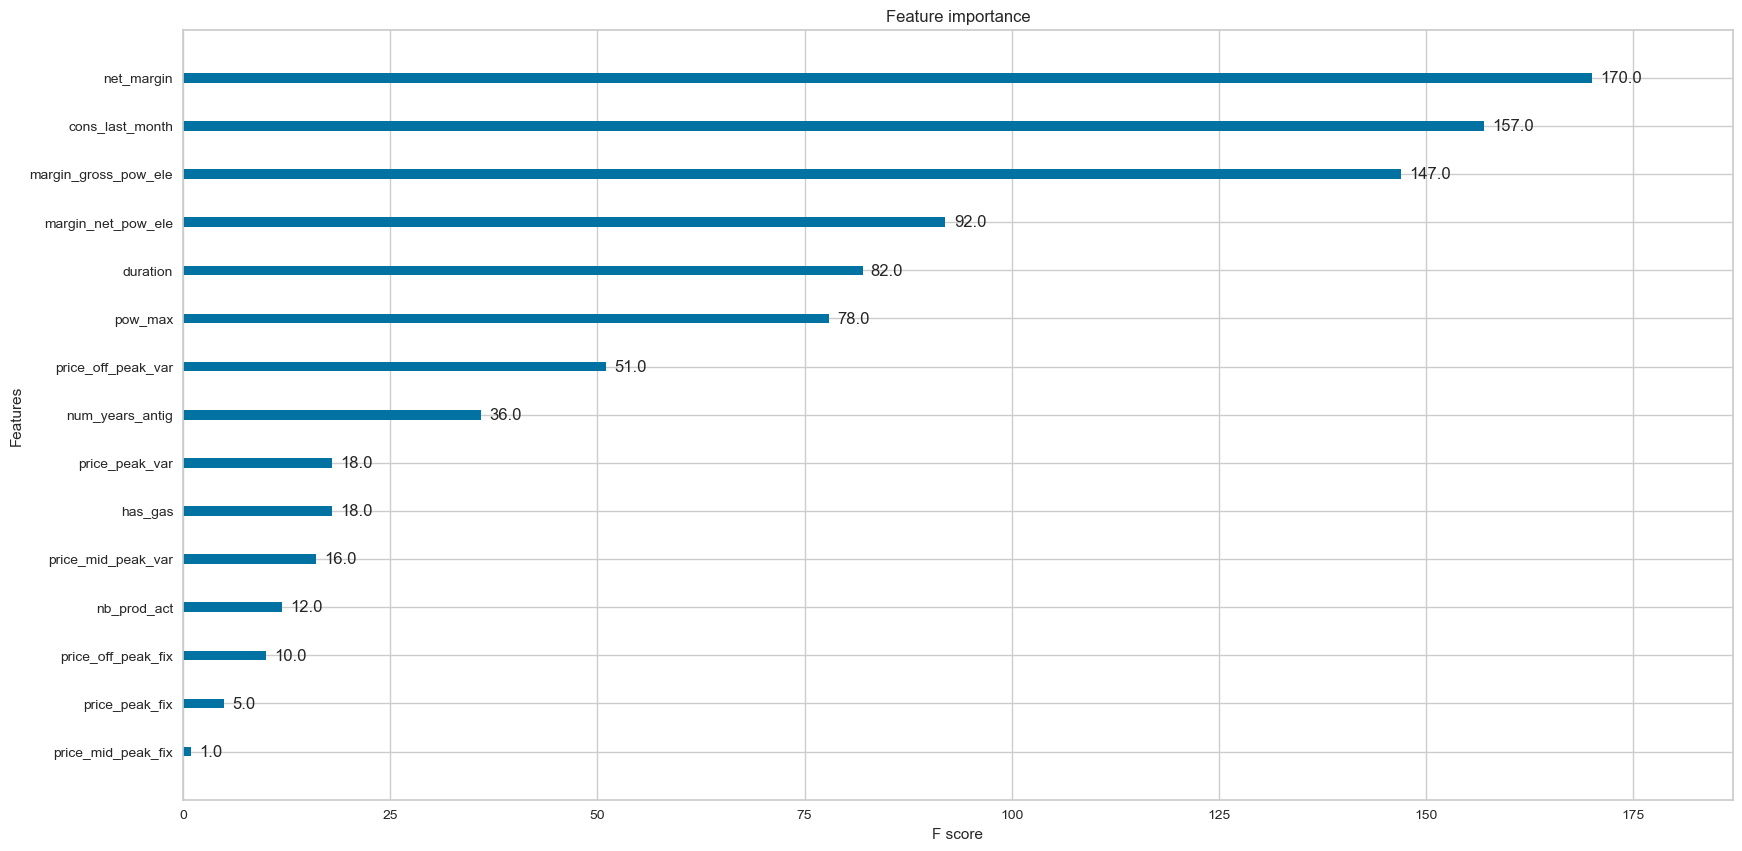

In [156]:
fig, ax = plt.subplots(figsize=(20,10))
xg.plot_importance(xgbtmodel.get_booster(),ax=ax)

# Cross-Validation

In [158]:
from sklearn.model_selection import cross_val_score

In [159]:
cv = cross_val_score(xgbtmodel,new_X,new_y,cv=5,verbose=1,scoring='f1')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[18:42:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimatores" } are not used.

[18:42:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimatores" } are not used.

[18:42:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimatores" } are not used.

[18:42:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimatores" } are not used.

[18:42:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimatores" } 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished


In [160]:
cv.mean()

0.5908709411640868